# Logitic Regression

In [7]:
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [8]:
maldata=pd.read_csv('./malware.csv',sep='|')

x=maldata.drop(['Name', 'md5', 'legitimate'], axis=1).values
y=maldata['legitimate'].values

feature_select_model=ExtraTreesClassifier()
feature_select_model.fit(x,y)
model = SelectFromModel(feature_select_model, prefit=True)
x=model.transform(x)

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=30)

## Grid Search

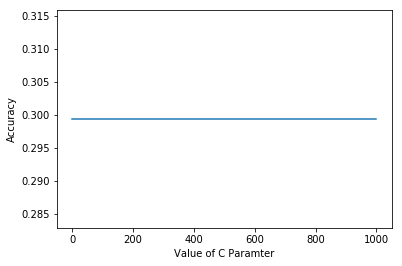

0.2993400798278847
{'C': 0.001}
LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


In [14]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }

model=LogisticRegression(penalty='l2')
grid=GridSearchCV(model,param_grid,cv=10,scoring='accuracy')
grid.fit(x,y)

grid_mean_scores= [result.mean_validation_score for result in grid.grid_scores_]
C=[0.001, 0.01, 0.1, 1, 10, 100, 1000]
plt.plot(C,grid_mean_scores)
plt.xlabel('Value of C Paramter')
plt.ylabel('Accuracy')
plt.show()

print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)